In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import confusion_matrix
plt.style.use('dark_background')

In [2]:
#Uploading dataset
data = pd.read_excel('dataset.xlsx')
data.head()

,DATE,VALUES
0,1972-08-22,0.2673
1,1972-08-23,0.2703
2,1972-08-24,0.2706
3,1972-08-25,0.2722
4,1972-08-28,0.2704


In [3]:
new_data = pd.DataFrame(index=range(0,len(data)),columns=['DATE', 'VALUES'])

for i in range(0,len(data)):
    new_data['DATE'][i] = data['DATE'][i]
    new_data['VALUES'][i] = data['VALUES'][i]

#Data column is formatted and set as index
new_data['DATE'] = pd.to_datetime(new_data.DATE,format='%Y-%m-%d')
new_data.index = new_data['DATE']

#Preparing data
new_data.rename(columns={'VALUES': 'y', 'DATE': 'ds'}, inplace=True)

#Splitting train and test dataset 
train = new_data[:9744]
valid = new_data[9744:]

#Fitting the model
model = Prophet(daily_seasonality=True)
model.fit(train)

#Prediction using prophet
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [4]:
#Calculating the rmse value
forecast_valid = forecast['yhat'][9744:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

0.5521703910904947

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



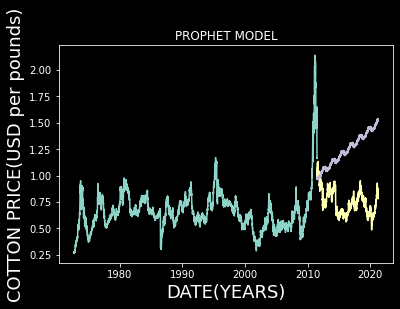

In [7]:
#Plotting the predicted values
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values
plt.title('PROPHET MODEL')
plt.xlabel('DATE(YEARS)',fontsize=18)
plt.ylabel('COTTON PRICE(USD per pounds)',fontsize=18)
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])
plt.show()

In [8]:
#Reshaping the values
val_x = []

val_pred = []
val_x = valid['y']
val_pred = valid['Predictions']

val_x =val_x.to_numpy().reshape(-1,1)
val_pred=val_pred.to_numpy().reshape(-1,1)

In [9]:
cutoff = 0.9                             # decide on a cutoff limit
y_pred_classes = np.zeros_like(val_pred)    # initialise a matrix full with zeros
y_pred_classes[val_pred > cutoff] = 1  
y_test_classes = np.zeros_like(val_pred)
y_test_classes[val_x > cutoff] = 1
cm =confusion_matrix(y_test_classes, y_pred_classes)

In [10]:
#Calculating the model accuracy
TP, FP, FN, TN = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
ACC = (TP+TN)/(TP+TN+FP+FN)
print("****Prophet****")
print("RMSE value : ",rms)
print("ACCURACY: ", ACC)

****Prophet****
RMSE value :  0.5521703910904947
ACCURACY:  0.09943411479385611
